In [3]:
# import system modules
import sys
import os
import gc

# import standard numerical modules
import numpy as np
import math

# import machine learning modules
import tensorflow as tf
import keras.backend as K

gpu = tf.config.list_physical_devices('GPU') # make sure GPU usage is enabled
print(gpu)

sys.path.append('../')
import DCTR


[]


# load data

In [2]:
# directory with pre converted lhe files as numpy arrays
data_dir = '../../Data' # modify as needed


In [3]:
# Load POWHEG hvq x0 datasets
# x0_nrm for training, x0_plt and x0_plt_nrm for calculating stats used to decide which model performs best
# only contain tt-pair; every event has order: 
    # tt-pair, top, anti-top
# every particle has arguments: 
    # [pt, y, phi, mass, eta, E, PID, w, theta]
    # [0 , 1, 2  , 3   , 4  , 5, 6  , 7, 8    ]

# POWHEG hvq
x0_nrm = []
x0_nrm = np.load(f'{data_dir}/POWHEG_hvq/showered/normed_lhe_01.npy')[:9543943] # 9543943 num of NNLO samples
print(f'POWHEG hvq x0_nrm.shape:     {x0_nrm.shape}')

# plotting data; different from training data; for calculating stats
x0_plt = []
x0_plt = np.load(f'{data_dir}/POWHEG_hvq/showered/converted_lhe_02.npy')[:9543943]
print(f'POWHEG hvq x0_plt.shape:     {x0_plt.shape}')

x0_plt_nrm = []
x0_plt_nrm = np.load(f'{data_dir}/POWHEG_hvq/showered/normed_lhe_02.npy')[:9543943]
print(f'POWHEG hvq x0_plt_nrm.shape: {x0_plt_nrm.shape}')



POWHEG hvq x0_nrm.shape:     (9543943, 3, 9)
POWHEG hvq x0_plt.shape:     (9543943, 3, 9)
POWHEG hvq x0_plt_nrm.shape: (9543943, 3, 9)


In [4]:
# MiNNLO x1
# training data
x1_nrm = []
x1_nrm = np.load(f'{data_dir}/MiNNLO/showered/normed_lhe.npy')
print(f'MiNNLO all particles x1_nrm.shape: {x1_nrm.shape}')

# plotting data
x1_plt = []
x1_plt = np.load(f'{data_dir}/MiNNLO/showered/converted_lhe.npy')
print(f'MiNNLO all particles x1_plt.shape: {x1_plt.shape}')


MiNNLO all particles x1_nrm.shape: (9543943, 3, 9)
MiNNLO all particles x1_plt.shape: (9543943, 3, 9)


In [5]:
# get normalized event generator weights | all weigths = +/-1
x0_wgt = x0_nrm[:, 0, 7].copy()
x0_plt_wgt = x0_plt_nrm[:, 0, 7].copy() 

x1_wgt = x1_nrm[:, 0, 7].copy()
x1_plt_wgt = x1_plt[:, 0, 7].copy()


In [6]:
# delete eta (pseudorapidity) and Energy -> Train only with [pt, y, phi, m, PID]

# delete energy
x0_nrm = np.delete(x0_nrm, 5, -1)
x0_plt_nrm = np.delete(x0_plt_nrm, 5, -1)
x1_nrm = np.delete(x1_nrm, 5, -1)

# delete eta
x0_nrm = np.delete(x0_nrm, 4, -1)
x0_plt_nrm = np.delete(x0_plt_nrm, 4, -1)
x1_nrm = np.delete(x1_nrm, 4, -1)


In [ ]:
# prep arrays for training
x_train, x_val, y_train, y_val, wgt_train, wgt_val = DCTR.prep_arrays(x0_nrm, x1_nrm, val=0.25)


In [7]:
K.clear_session() 
gc.collect() # cpu gabage collection to free up memory from discarded temp arrays


71


# training loop

In [ ]:
# MSE loss

# setup DCTR neural network
''' default setup_nn() args:
input_dim=5, Phi_sizes = (100,100,128), F_sizes = (100,100,100),
loss = 'cce', dropout=0.0, l2_reg=0.0, Phi_acts='relu', F_acts='relu', output_act='softmax',
learning_rate=0.001, patience=10, use_scheduler=True, monitor='val_loss', reduceLR = True,
mode='min', savePath=currentPath, saveLabel='DCTR_training', summary=False, verbose = 2
'''

dctr, callbacks = DCTR.setup_nn(saveLabel=f'20240903_DCTR_training_mse_{process_id}', loss='mse', patience=30, learning_rate=0.001, use_scheduler=False)



2024-06-25 14:57:19.045946: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/250

Epoch 1: val_loss improved from inf to 0.21748, saving model to /tf/home/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/20240521_showered_new/train_20240523_regular_epochs.tf


2024-05-23 18:33:56.016013: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tf/home/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/20240521_showered_new/train_20240523_regular_epochs.tf/assets
110/110 - 7s - loss: 0.2257 - acc: 0.5216 - val_loss: 0.2175 - val_acc: 0.5298 - lr: 0.0010 - 7s/epoch - 68ms/step
Epoch 2/250

Epoch 2: val_loss improved from 0.21748 to 0.21649, saving model to /tf/home/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/20240521_showered_new/train_20240523_regular_epochs.tf
INFO:tensorflow:Assets written to: /tf/home/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/20240521_showered_new/train_20240523_regular_epochs.tf/assets
110/110 - 6s - loss: 0.2169 - acc: 0.5306 - val_loss: 0.2165 - val_acc: 0.5319 - lr: 0.0010 - 6s/epoch - 53ms/step
Epoch 3/250

Epoch 3: val_loss improved from 0.21649 to 0.21583, saving model to /tf/home/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/20240521_showered_new/train_20240523_regular_epochs.tf
INFO:tensorflow:Assets written to: /tf/home/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/20240521_showered_new/tr

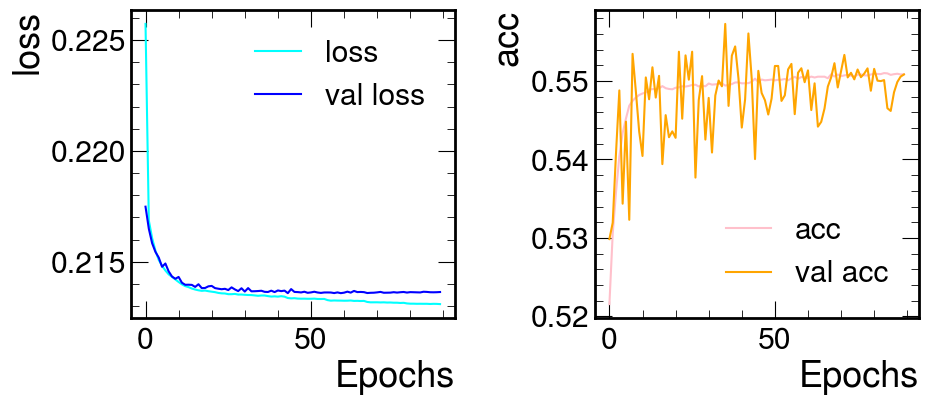

clearing keras session and collecting garbage


0.21308791637420654

In [ ]:
# train DCTR neural network
''' train() necessary args:
dctr, callbacks, X_train, Y_train, X_val, Y_val
default args: 
wgt_train=1.0, wgt_val=1.0, epochs=80, batch_size=8192, savePath=currentPath, saveLabel='DCTR_training', verbose = 2, plot=True
'''


DCTR.train(dctr, callbacks, x_train, y_train, x_val, y_val, wgt_train=wgt_train, wgt_val=wgt_val, batch_size=8192*16, savePath = train_dir, saveLabel=f'20240903_DCTR_training_mse_{process_id}', epochs=250)



In [ ]:
# CCE loss
gc.colllect()
K.clear_session()



# setup DCTR neural network
''' default setup_nn() args:
input_dim=5, Phi_sizes = (100,100,128), F_sizes = (100,100,100),
loss = 'cce', dropout=0.0, l2_reg=0.0, Phi_acts='relu', F_acts='relu', output_act='softmax',
learning_rate=0.001, patience=10, use_scheduler=True, monitor='val_loss', reduceLR = True,
mode='min', savePath=currentPath, saveLabel='DCTR_training', summary=False, verbose = 2
'''

dctr, callbacks = DCTR.setup_nn(saveLabel=f'20240903_DCTR_training_cce_{process_id}', loss='cce', patience=30, learning_rate=0.001, use_scheduler=False)




In [ ]:
# train DCTR neural network
''' train() necessary args:
dctr, callbacks, X_train, Y_train, X_val, Y_val
default args: 
wgt_train=1.0, wgt_val=1.0, epochs=80, batch_size=8192, savePath=currentPath, saveLabel='DCTR_training', verbose = 2, plot=True
'''


DCTR.train(dctr, callbacks, x_train, y_train, x_val, y_val, wgt_train=wgt_train, wgt_val=wgt_val, batch_size=8192*16, savePath = train_dir, saveLabel=f'20240903_DCTR_training_cce_{process_id}', epochs=250)

